In [29]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
accident = pd.read_csv('datasets\\uk_road_accident.csv')

In [31]:
# Step 1: Convert to string only if not null
accident['Accident Date'] = accident['Accident Date'].astype(str)
# Step 2: Replace '/' with '-' safely
accident['Accident Date'] = accident['Accident Date'].apply(lambda x: x.replace('/', '-') if pd.notnull(x) else x)
# Step 3: Strip whitespace
accident['Accident Date'] = accident['Accident Date'].apply(lambda x: x.strip() if pd.notnull(x) else x)
# Step 4: Convert to datetime
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst=True, errors='coerce')


accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unaccounted')
accident['Road_Type'] = accident['Road_Type'].fillna('unaccounted')
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unaccounted')

accident.dtypes
accident.isnull().sum()

accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] =  accident['Accident Date'].dt.month
accident['Day'] =  accident['Accident Date'].dt.day
accident['DayOfWeek'] =  accident['Accident Date'].dt.dayofweek
accident.isnull().sum()

Index                       0
Accident_Severity           0
Accident Date               0
Latitude                    0
Light_Conditions            0
District Area               0
Longitude                   0
Number_of_Casualties        0
Number_of_Vehicles          0
Road_Surface_Conditions     0
Road_Type                   0
Urban_or_Rural_Area        15
Weather_Conditions          0
Vehicle_Type                0
Year                        0
Month                       0
Day                         0
DayOfWeek                   0
dtype: int64

<h2>Clearing any Inconsistencies with the Data Set</h2>

In [32]:
accident['Accident Date'] = accident['Accident Date'].astype('str')
accident['Accident Date'] = accident['Accident Date'].str.strip()
accident['Accident Date'] = accident['Accident Date'].str.replace('/', '-')

In [33]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

<h2>Adjusting Data Types</h2>

In [34]:
accident.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
Year                                int32
Month                               int32
Day                                 int32
DayOfWeek                           int32
dtype: object

<h2>Extracting Date Informatiom Using Pandas Date Time</h2>

In [35]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] =  accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayofWeek'] = accident['Accident Date'].dt.dayofweek

In [36]:
accident.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                        0
Light_Conditions                0
District Area                   0
Longitude                       0
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions         0
Road_Type                       0
Urban_or_Rural_Area            15
Weather_Conditions              0
Vehicle_Type                    0
Year                       395672
Month                      395672
Day                        395672
DayOfWeek                       0
DayofWeek                  395672
dtype: int64

<h2>Advanced Groupby Functions</h2>
<ul>
    <li>UNSTUCK | unstack()</li>
    <li>RESET_INDEX | reset_index()</li>
</ul>

In [37]:
accident.dtypes

severity = accident.groupby(['Accident_Severity', 'Year']).size()
severity

Accident_Severity  Year  
Fatal              2019.0     1116
                   2020.0      942
                   2021.0      823
                   2022.0      623
Serious            2019.0     9823
                   2020.0     9346
                   2021.0     8858
                   2022.0     7266
Slight             2019.0    60928
                   2020.0    59875
                   2021.0    56491
                   2022.0    48916
dtype: int64

In [ ]:
severity2 = accident.groupby(['Accident_Severity', 'Year']).size()
severity2.unstack()

In [ ]:
severity3 = accident.groupby(['Accident_Severity', 'Year']).size()
severity3.unstack(level=0)

In [ ]:
severity3 = accident.groupby(['Accident_Severity', 'Year']).size()
severity3.reset_index()

In [ ]:
monthly_data = accident.groupby(['Year', 'Month']).size()
monthly_data = monthly_data.unstack(level=0)
monthly_data.plot(marker='>', figsize=(10,5), title='Monthly Road Accidents by Year (2022)')

plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(alpha=0.5)
plt.show

In [ ]:
accident[accident['District Area'] == 'City of Londo']

<h2>PIE CHART IN MATPLOTLIB</h2>

In [ ]:
severity = accident['Accident_Severity'].value_counts()

In [ ]:
severity.index

In [ ]:
severity.values

In [ ]:
plt.pie(severity, labels = severity.index, startangle = 90, autopct = '%1.1f%%', colors = ['Peru','Cornflowerblue','Darksalmon'])
plt.show()

<h1>Data Visualizations using Seaborn </h1>
<hr>
<br>

<p>Seaborn is visualization library built on top of Matplotlib</p>
<p>It was created not to replace Matplot but rather to create enhancement and options</p>

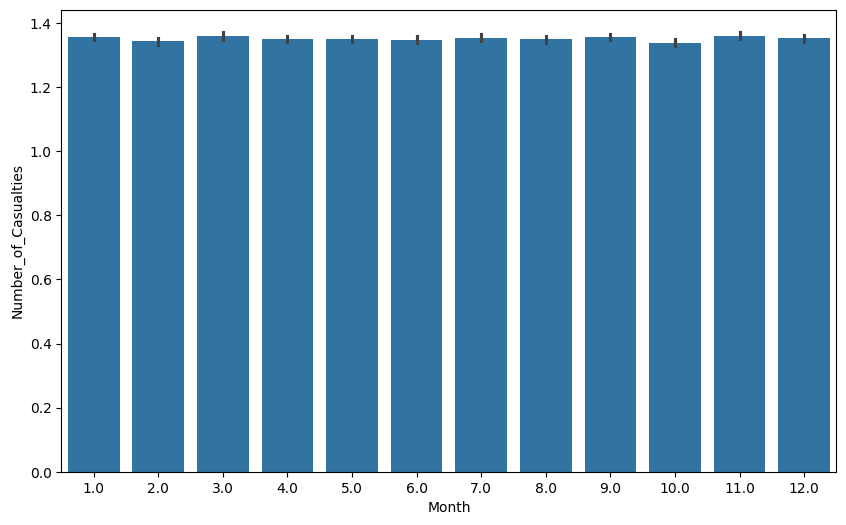

In [40]:
sns.barplot(data=accident, y='Number_of_Casualties', x = 'Month')
# plt.xticks(range(0,11, ['Jan -- December'])
plt.gcf().set_size_inches(10, 6)
plt.show()

<Axes: xlabel='Month', ylabel='Number_of_Casualties'>

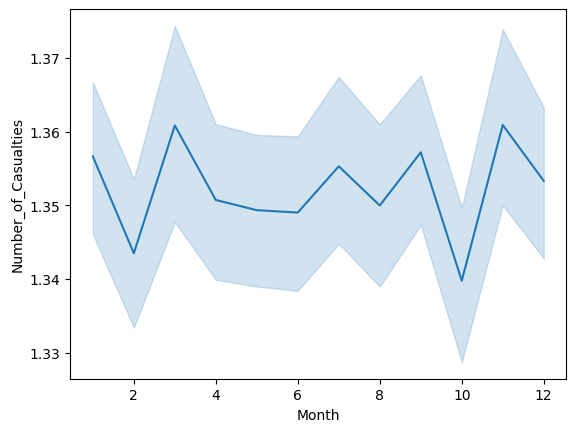

In [41]:
sns.lineplot(data=accident, y='Number_of_Casualties', x = 'Month')

<hr>
<h1> Part 1: Using District Area to make a comparison to a general result </h1>
<h3>Shepway Analysis</h3>
<img src = 'https://cdn.britannica.com/54/148754-050-9930A07D/St-Clements-Church-Old-Romney-Shepway-Eng.jpg'\>

In [ ]:
# df.dtypes
Shepway_accident = accident[accident['District Area'] == 'Shepway']

In [ ]:
monthly_londondata = Shepway_accident.groupby(['Year', 'Month', ]).size()

monthly_londondata = monthly_londondata.unstack(level=0)

monthly_londondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Shepway by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# Accidents per year
accidents_per_year = Shepway_accident['Year'].value_counts().sort_index()
accidents_per_month = Shepway_accident['Month'].value_counts().sort_index()
accidents_per_day = Shepway_accident['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

<H1>GEOSPATIAL ANALYSIS</H1>
<h3>FOLIUM LIBRARY<h3>
#install pip install folium

In [ ]:
import folium
from folium.plugins import HeatMap

locations = list(zip(Shepway_accident['Latitude'], Shepway_accident['Longitude']))

m = folium.Map(location=[Shepway_accident['Latitude'].mean(), Shepway_accident['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m)

m.save('accident_heatmap.html')
m

In [ ]:
accidents_per_month_severity = accident.groupby(['Month', 'Accident_Severity']).size().unstack()

accidents_per_month_severity.plot(kind='bar', stacked=True)
plt.title('Accidents per Month by Severity')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.legend(bbox_to_anchor = (1.05, 1), loc='upper left', title='Accident Severity')
plt.gcf().set_size_inches(10,4)
#plt.figure(figsize = (12,8))
plt.xticks(range(0, 12), ['jan', 'feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

<h1> Part 2: Using District Area to make a comparison to a general result </h1>
<h3>East Hampshire Analysis</h3>
<img src = 'https://eu-assets.simpleview-europe.com/hampshire2016/imageresizer/?image=%2Fdmsimgs%2Feastmeon2_web%20size.jpg&action=ProductDetail'\>

In [ ]:
# df.dtypes
East_Hampshire_accident = accident[accident['District Area'] == 'East Hampshire']

In [ ]:
monthly_londondata = East_Hampshire_accident.groupby(['Year', 'Month', ]).size()

monthly_londondata = monthly_londondata.unstack(level=0)

monthly_londondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in East Hampshire by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# Accidents per year
accidents_per_year = East_Hampshire_accident['Year'].value_counts().sort_index()
accidents_per_month = East_Hampshire_accident['Month'].value_counts().sort_index()
accidents_per_day = East_Hampshire_accident['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

In [ ]:
locations = list(zip(East_Hampshire_accident['Latitude'], East_Hampshire_accident['Longitude']))

m = folium.Map(location=[East_Hampshire_accident['Latitude'].mean(), East_Hampshire_accident['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m)

m.save('accident_heatmap.html')
m

<hr>

<h1> Part 3: Using District Area to make a comparison to a general result </h1>
<h3>Restormel Analysis</h3>
<img src = 'https://upload.wikimedia.org/wikipedia/commons/c/c9/RestormelCastle.JPG'\>

In [ ]:
Restormel_accident = accident[accident['District Area'] == 'Restormel']

In [ ]:
monthly_londondata = Restormel_accident.groupby(['Year', 'Month', ]).size()

monthly_londondata = monthly_londondata.unstack(level=0)

monthly_londondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Restormel by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

In [ ]:
accidents_per_year = Restormel_accident['Year'].value_counts().sort_index()
accidents_per_month = Restormel_accident['Month'].value_counts().sort_index()
accidents_per_day = Restormel_accident['DayOfWeek'].value_counts().sort_index()
 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

In [ ]:
locations = list(zip(Restormel_accident['Latitude'], Restormel_accident['Longitude']))

m = folium.Map(location=[Restormel_accident['Latitude'].mean(), Restormel_accident['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m)

m.save('accident_heatmap.html')
m

<hr>

<h1> Part 4: Using District Area to make a comparison to a general result </h1>
<h3>Three Rivers Analysis</h3>
<img src = 'https://upload.wikimedia.org/wikipedia/commons/f/f6/Church_Street%2C_Rickmansworth_-_geograph.org.uk_-_5250876.jpg'\>

In [ ]:
Three_Rivers_accident = accident[accident['District Area'] == 'Three Rivers']

In [ ]:
monthly_londondata = Three_Rivers_accident.groupby(['Year', 'Month', ]).size()

monthly_londondata = monthly_londondata.unstack(level=0)

monthly_londondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Three Rivers by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

In [ ]:
accidents_per_year = Three_Rivers_accident['Year'].value_counts().sort_index()
accidents_per_month = Three_Rivers_accident['Month'].value_counts().sort_index()
accidents_per_day = Three_Rivers_accident['DayOfWeek'].value_counts().sort_index()
 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

In [ ]:
locations = list(zip(Three_Rivers_accident['Latitude'], Three_Rivers_accident['Longitude']))

m = folium.Map(location=[Three_Rivers_accident['Latitude'].mean(), Three_Rivers_accident['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m)

m.save('accident_heatmap.html')
m

<hr>

<h1> Part 5: Using District Area to make a comparison to a general result </h1>
<h3>Richmond upon Thames Analysis</h3>
<img src = 'https://static.wixstatic.com/media/e52a8a_421c7ff915bc4afdb51249f93fcad033~mv2.jpg/v1/fill/w_1000,h_668,al_c,q_85,usm_0.66_1.00_0.01/e52a8a_421c7ff915bc4afdb51249f93fcad033~mv2.jpg'\>

In [ ]:
Richmond_upon_Thames_accident = accident[accident['District Area'] == 'Richmond upon Thames']

In [ ]:
monthly_londondata = Richmond_upon_Thames_accident.groupby(['Year', 'Month', ]).size()

monthly_londondata = monthly_londondata.unstack(level=0)

monthly_londondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Richmond upon Thames by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

In [ ]:
accidents_per_year = Richmond_upon_Thames_accident['Year'].value_counts().sort_index()
accidents_per_month = Richmond_upon_Thames_accident['Month'].value_counts().sort_index()
accidents_per_day = Richmond_upon_Thames_accident['DayOfWeek'].value_counts().sort_index()
 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

In [ ]:
locations = list(zip(Richmond_upon_Thames_accident['Latitude'], Richmond_upon_Thames_accident['Longitude']))

m = folium.Map(location=[Richmond_upon_Thames_accident['Latitude'].mean(), Richmond_upon_Thames_accident['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m)

m.save('accident_heatmap.html')
m

<hr>

<h1> Part 6: Using District Area to make a comparison to a general result </h1>
<h3>Blaby Analysis</h3>
<img src = 'https://cdn.prod.website-files.com/6718b67049555655c1a7d492/672bad33ee145d12002d1d98_blaby-conservation-area-appraisal-header.jpg'\>

In [ ]:
Blaby_accident = accident[accident['District Area'] == 'Blaby']

In [ ]:
monthly_londondata = Blaby_accident.groupby(['Year', 'Month', ]).size()

monthly_londondata = monthly_londondata.unstack(level=0)

monthly_londondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Blaby upon Thames by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

In [ ]:
accidents_per_year = Blaby_accident['Year'].value_counts().sort_index()
accidents_per_month = Blaby_accident['Month'].value_counts().sort_index()
accidents_per_day = Blaby_accident['DayOfWeek'].value_counts().sort_index()
 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

In [ ]:
locations = list(zip(Blaby_accident['Latitude'], Blaby_accident['Longitude']))

m = folium.Map(location=[Blaby_accident['Latitude'].mean(), Blaby_accident['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m)

m.save('accident_heatmap.html')
m